Tc = 127.825577
Pc = 33.879335
Vc = 0.116100


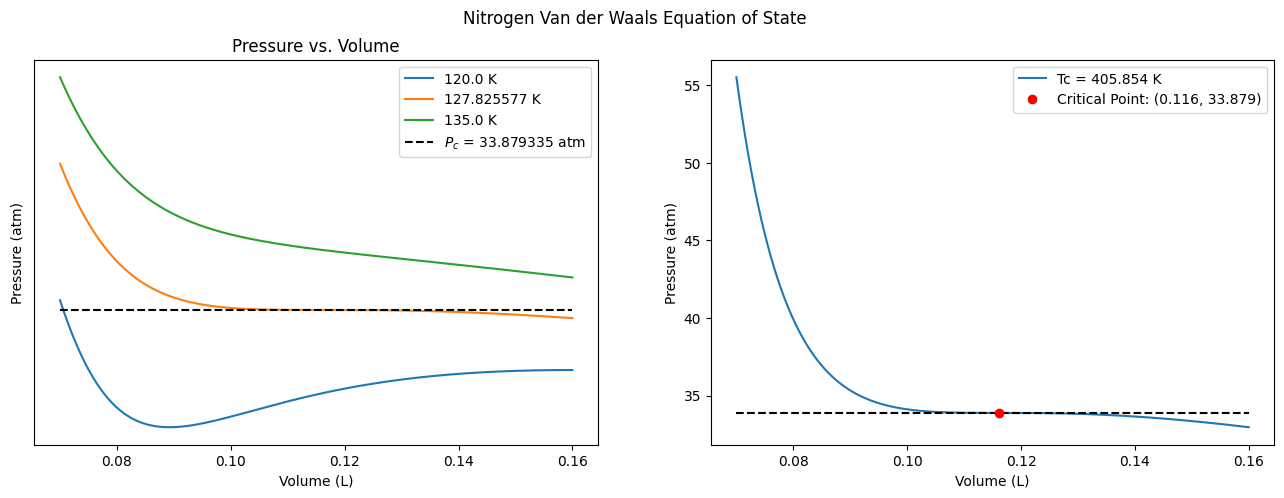

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# define physical constants
R = 0.0820574587  # L*atm/(mol*K)

# define nitrogen's van der Waals constants
a = 1.37  # atm*L^2/mol^2
b = 0.0387  # L/mol


print('Tc = %f' % ((8*a)/(27*b*R)))     # nitrogen's critical temperature
print('Pc = %f' % (a/(27*b*b)))         # nitrogen's critical pressure
print('Vc = %f' % (3*b))                # nitrogen's critical volume


Vdata = np.linspace(0.07, 0.16, 1000)       # V in L (Vc = 3b)
Tdata = np.array([120, 127.825577, 135])    # T in K (Tc = 8a/27bR)
Pdata = np.zeros((len(Vdata), len(Tdata)))  # P in atm (Pc = a/27b^2)


# figure
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(16, 5))
fig.suptitle('Nitrogen Van der Waals Equation of State')


# ax1
for j in range(len(Tdata)):
    for i in range(len(Vdata)):
        Pdata[i, j] = R*Tdata[j]/(Vdata[i] - b) - a/(Vdata[i]**2)
    ax1.plot(Vdata, Pdata[:, j], label=str(Tdata[j]) + ' K')

ax1.plot(Vdata, [33.879335 for i in range(len(Vdata))], 'k--', label='$P_c$ = 33.879335 atm')

ax1.set_title('Pressure vs. Volume')
ax1.set_xlabel('Volume (L)')
ax1.set_ylabel('Pressure (atm)')
ax1.legend(loc='best')


# ax2
ax2.plot(Vdata, Pdata[:, 1], label='Tc = 405.854 K')
ax2.plot(Vdata, [(a/27/b**2) for _ in range(len(Vdata))], 'k--')
ax2.plot(3*b, a/27/b**2, 'ro', label='Critical Point: (0.116, 33.879)')

ax2.set_xlabel('Volume (L)')
ax2.set_ylabel('Pressure (atm)')
ax1.set_yscale('symlog')
ax2.legend(loc='best')


plt.show()
